In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 98% 702M/715M [00:08<00:00, 128MB/s]
100% 715M/715M [00:08<00:00, 86.2MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.4 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
len(filenames)

50000

In [ ]:
#labels

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id']== 45000]

,id,label
44999,45000,frog


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

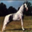

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/69.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 69]

,id,label
68,69,horse


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
#image processing

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)

  data.append(image)

In [ ]:
len(data)

50000

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
#convert images list and label lsit label to numpy arrays

In [ ]:
X= np.array(data)
y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
#Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=2)

In [ ]:
#Scaling the data

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled 

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8051 - acc: 0.3443 - val_loss: 1.7869 - val_acc: 0.3453
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8001 - acc: 0.3470 - val_loss: 1.7916 - val_acc: 0.3372
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7990 - acc: 0.3472 - val_loss: 1.8032 - val_acc: 0.3360
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7969 - acc: 0.3456 - val_loss: 1.8094 - val_acc: 0.3285
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7961 - acc: 0.3478 - val_loss: 1.8021 - val_acc: 0.3298
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7945 - acc: 0.3464 - val_loss: 1.7857 - val_acc: 0.3390
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7899 - acc: 0.3501 - val_loss: 1.7815 - val_acc: 0.3478
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

ResNet - 50

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights= 'imagenet', include_top=False, input_shape = (256, 256, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [51]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [52]:
history = model.fit(X_train_scaled, y_train, validation_split= 0.1, epochs = 10)

Epoch 1/10
1125/1125 [==============================] - 498s 398ms/step - loss: 1.6625 - acc: 0.4538 - val_loss: 0.8638 - val_acc: 0.7535
Epoch 2/10
1125/1125 [==============================] - 438s 389ms/step - loss: 0.9848 - acc: 0.7110 - val_loss: 0.4522 - val_acc: 0.8940
Epoch 3/10
1125/1125 [==============================] - 438s 390ms/step - loss: 0.7210 - acc: 0.8126 - val_loss: 0.3285 - val_acc: 0.9175
Epoch 4/10
1125/1125 [==============================] - 445s 396ms/step - loss: 0.5517 - acc: 0.8748 - val_loss: 0.2827 - val_acc: 0.9312
Epoch 5/10
1125/1125 [==============================] - 438s 390ms/step - loss: 0.4327 - acc: 0.9104 - val_loss: 0.2596 - val_acc: 0.9317
Epoch 6/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.3487 - acc: 0.9336 - val_loss: 0.2357 - val_acc: 0.9377
Epoch 7/10
1125/1125 [==============================] - 438s 389ms/step - loss: 0.2833 - acc: 0.9513 - val_loss: 0.2285 - val_acc: 0.9373
Epoch 8/10
1125/1125 [============

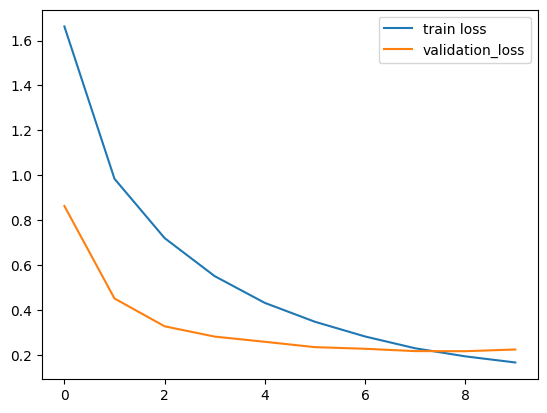

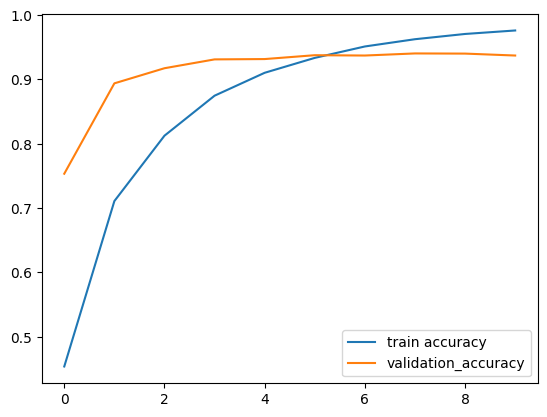

In [54]:
h = history

#loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

#accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label = 'validation_accuracy')
plt.legend()
plt.show()